# Time series decomposition and forecasting
*Apr 4, 2021 21:39*


 Forecasting is a very complicated process, such that excellent forecasting is able to stand out. The forecasting time range could be the future few years or even few seconds. 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.rcParams.update({"font.size": 14, "axes.labelweight": "bold", "figure.figsize": (20,10), "lines.linewidth": 2})

In [107]:
# reading time series data

url = "https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv"

df = pd.read_csv(url, index_col=0, parse_dates=True)
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


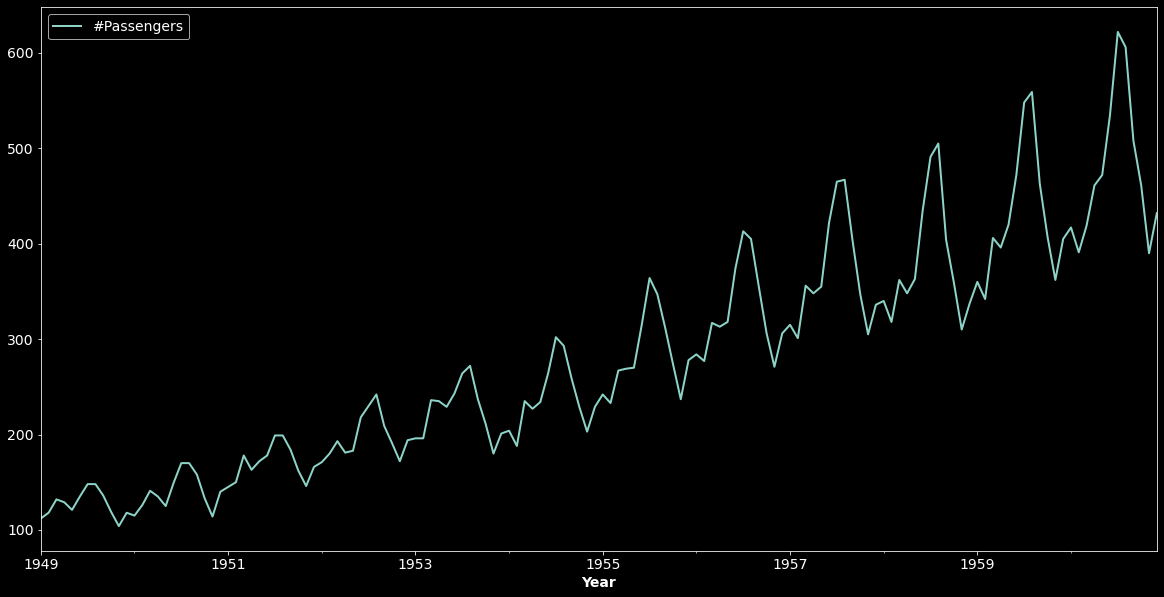

In [108]:
df.plot(xlabel='Year')
plt.show()

- From the graph, we noticed that the number of passengers are increasing gradually and stably from 1949 through 1960. The seasonality is easily captured here as the peaks are observed periodically.

In [109]:
from datetime import datetime

df['year'] = df.index.year
df['qtr'] = df.index.quarter
df['yearQtr'] = df.year.astype(str) + "_" + df.qtr.astype(str)
df_byqtr = df[['#Passengers', 'yearQtr']].groupby(['yearQtr']).sum()
df_byqtr.head()

,#Passengers
yearQtr,
1949_1,362
1949_2,385
1949_3,432
1949_4,341
1950_1,382


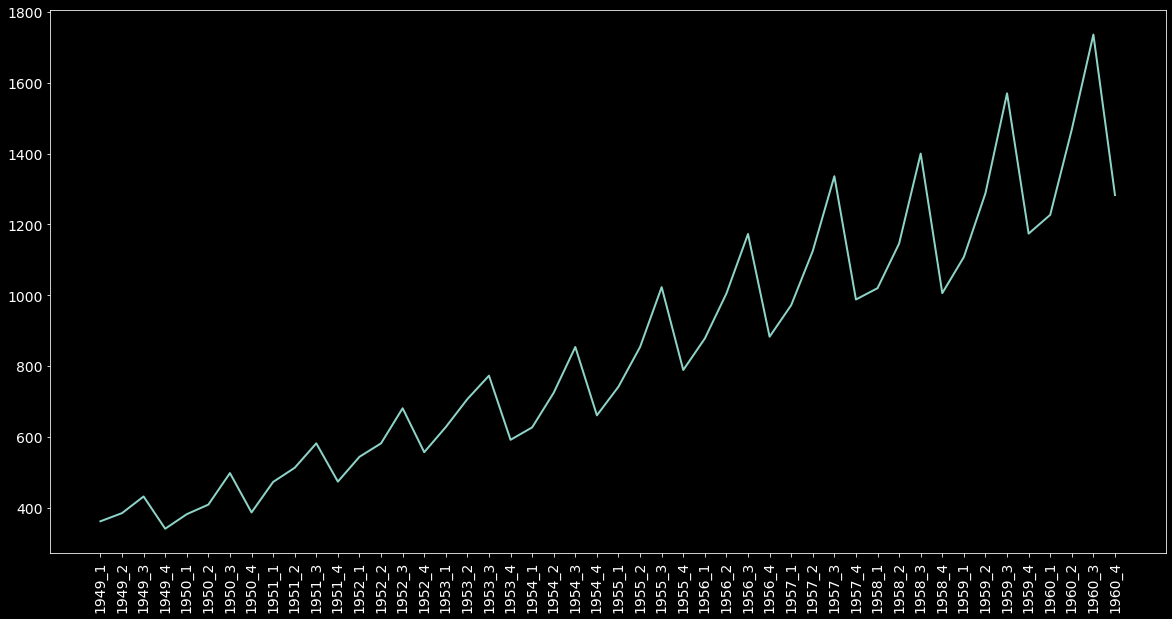

In [110]:
# plot by year qtr
plt.plot(df_byqtr)
plt.xticks(df_byqtr.index, rotation=90)
plt.show()


> It is observed that the number of passengers increased for all quarters by year.

- The components of time series:
    - trend
    - seasonality
    - cycle
    - white noise
- time series models:
    - additive: $y_t$ = trend-cycle + seasonality + remainder
    - multiplicative: $y_t$ = trend-cycle x seasonality x remainder
    - in reality, it could be the combination of both

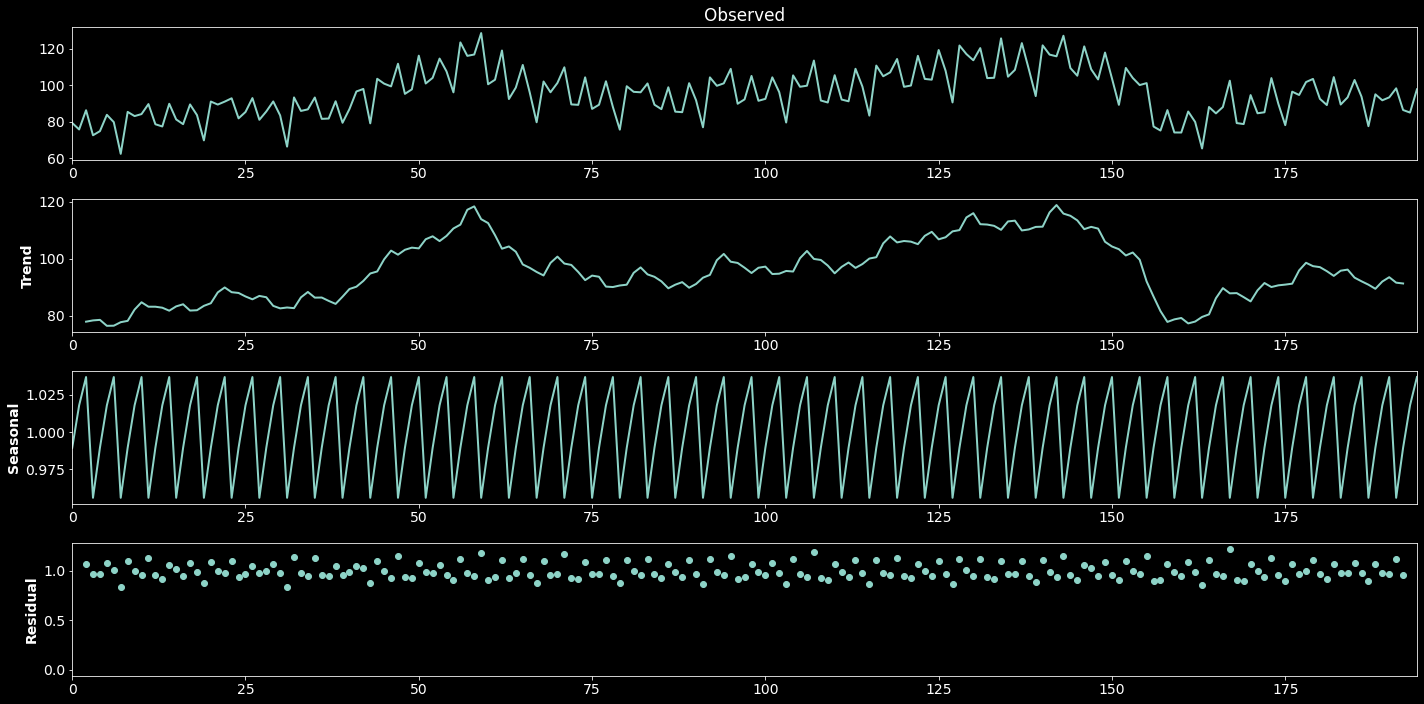

In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

url = "https://raw.githubusercontent.com/selva86/datasets/master/elecequip.csv"

elecequip = pd.read_csv(url, index_col=0, parse_dates=True)
res = seasonal_decompose(np.array(elecequip), model='mul', period=4)
res.plot()
plt.show()

- Some better decomposition approaches: 
    - [X11](https://otexts.com/fpp2/x11.html) : for decomposing quarterly and monthly data
    - [SEAT](https://otexts.com/fpp2/seats.html) = Seasonal Extraction in ARIMA Time Series, only with quarterly and monthly data
    - [STL](https://otexts.com/fpp2/stl.html) = Seasonal and Trend decomposition using Loess, Loess is a method for estimating nonlinear relationships

### STL decomposition

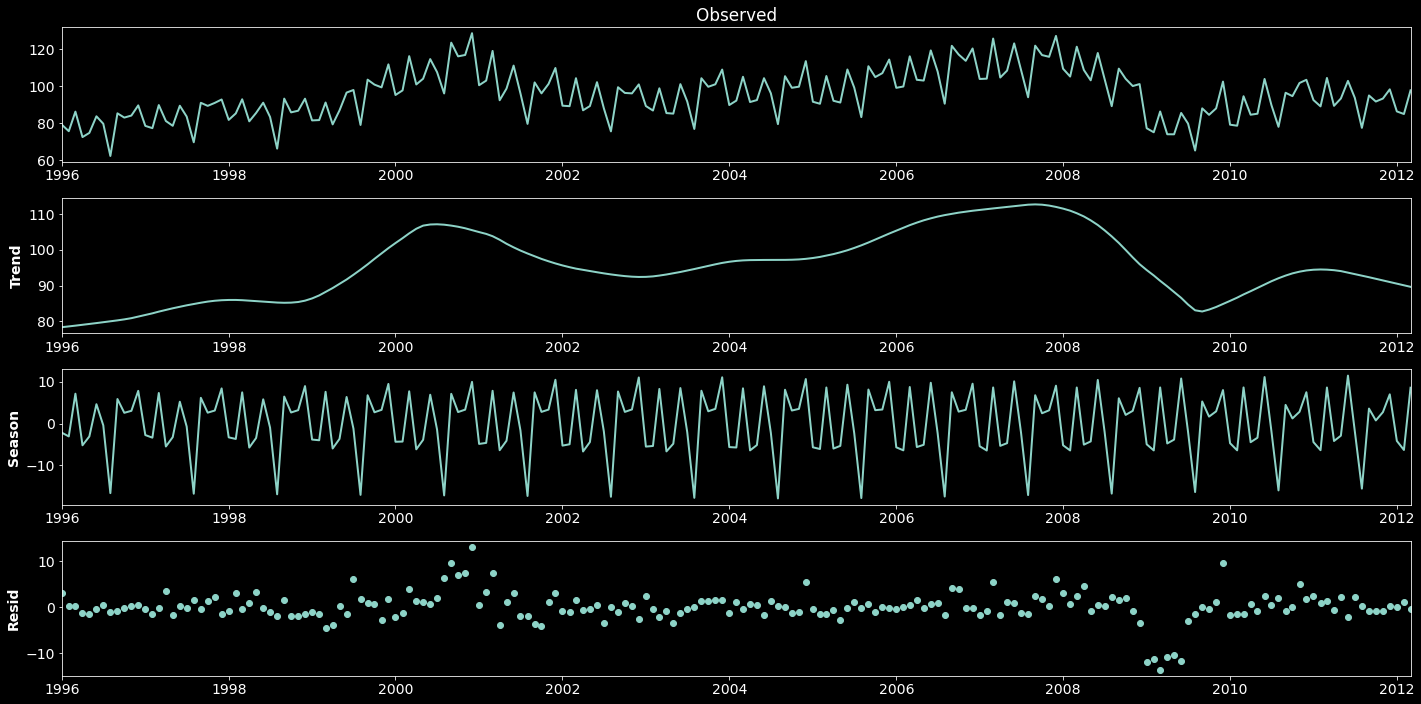

In [112]:
from statsmodels.tsa.seasonal import STL

stl = STL(elecequip, period=12, seasonal=13, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()

## Forecasting method
- SMA: simple moving average
- WMA:
- EMA:

### SMA

In [105]:
# Taking moving average of the last 6 obs
rolling = elecequip.rolling(window=6)
rolling_mean = rolling.mean()
rolling_mean.head(9)

,value
date,
1996-01-01,NaN
1996-02-01,NaN
1996-03-01,NaN
1996-04-01,NaN
1996-05-01,NaN
1996-06-01,78.786667
1996-07-01,78.861667
1996-08-01,76.633333
1996-09-01,76.481667


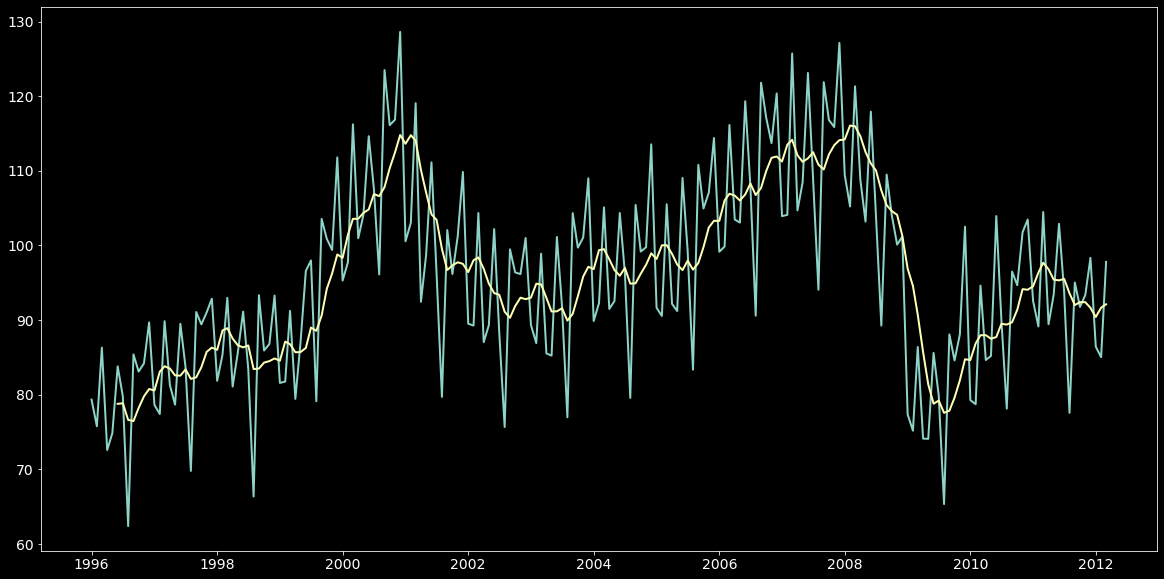

In [141]:
# plot the two series

plt.plot(elecequip)
plt.plot(rolling_mean)
plt.show()

In [116]:
elecequip['value'].rolling(window=3, center=True).mean()
# move the label to center

date
1996-01-01          NaN
1996-02-01    80.483333
1996-03-01    78.233333
1996-04-01    77.926667
1996-05-01    77.090000
                ...    
2011-11-01    94.493333
2011-12-01    92.716667
2012-01-01    89.940000
2012-02-01    89.760000
2012-03-01          NaN
Name: value, Length: 195, dtype: float64

### WMA: weighted moving average

In [124]:
import random

rand = [random.randint(1, i) for i in range(100, 110)]
data = {}

data['sales'] = rand
df1 = pd.DataFrame(data)
weights = np.array([.5, .25, .1])

sum_w = np.sum(weights)
df1['WMA'] = (
    df1.sales
    .rolling(window=3, center=True)
    .apply(lambda x: np.sum(weights*x)/sum_w, raw=False)
)

df1

,sales,WMA
0,55,NaN
1,18,49.294118
2,99,47.588235
3,67,83.235294
4,45,56.058824
5,29,40.764706
6,49,43.117647
7,99,62.176471
8,36,77.411765
9,73,NaN


### EMA: Exponential Moving Average: Holt-Winter's method

C:\Users\dengj\Miniconda3\envs\mds574\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\dengj\Miniconda3\envs\mds574\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


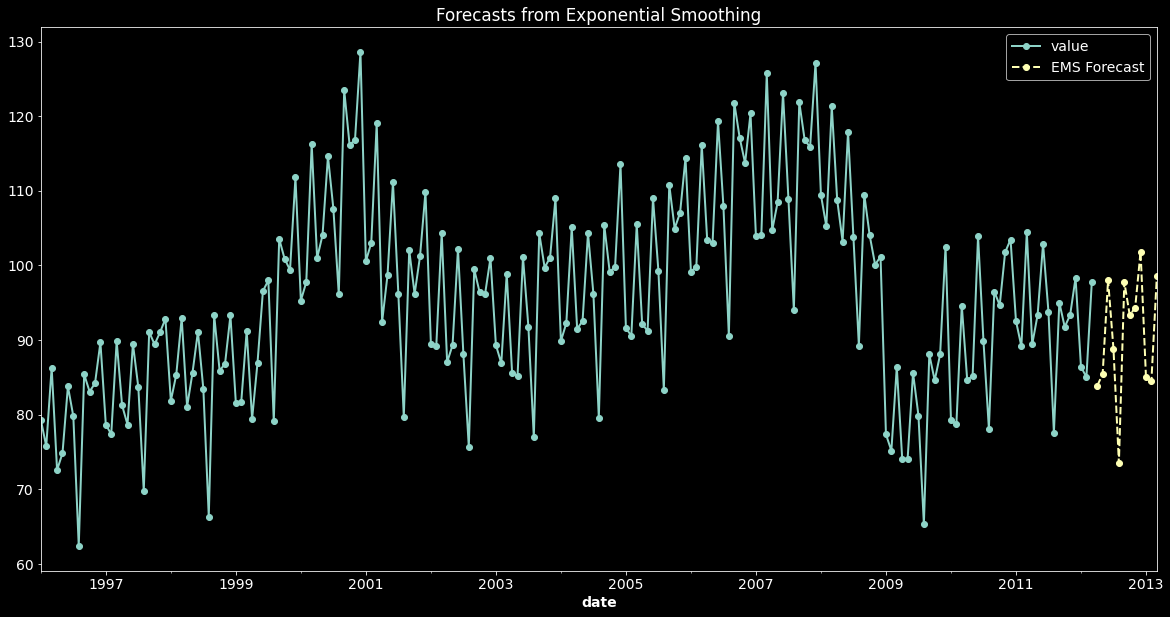

In [138]:
from statsmodels.tsa.api import ExponentialSmoothing

EMA_fit = ExponentialSmoothing(elecequip, seasonal_periods=12, trend='add', seasonal='add').fit()
fcast3 = EMA_fit.forecast(12)

ax = elecequip.plot(marker='o', title='Forecasts from Exponential Smoothing')

# for plotting fitted values
fcast3.rename('EMS Forecast').plot(ax=ax, style='--', marker='o', legend=True)
plt.show()